In [21]:
import xarray as xr

# for odiv-2
path = "/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_historical/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_daily_cmip/ts/daily/5yr/"

file_paths = [f'{path}ocean_daily_cmip.19200101-19241231.zos.nc',f'{path}ocean_daily_cmip.19250101-19291231.zos.nc',
              f'{path}ocean_daily_cmip.19300101-19341231.zos.nc',f'{path}ocean_daily_cmip.19350101-19391231.zos.nc',
              f'{path}ocean_daily_cmip.19400101-19441231.zos.nc',f'{path}ocean_daily_cmip.19450101-19491231.zos.nc',
              f'{path}ocean_daily_cmip.19500101-19541231.zos.nc',f'{path}ocean_daily_cmip.19550101-19591231.zos.nc',
              f'{path}ocean_daily_cmip.19600101-19641231.zos.nc',f'{path}ocean_daily_cmip.19650101-19691231.zos.nc',
              f'{path}ocean_daily_cmip.19700101-19741231.zos.nc',f'{path}ocean_daily_cmip.19750101-19791231.zos.nc',
              f'{path}ocean_daily_cmip.19800101-19841231.zos.nc',f'{path}ocean_daily_cmip.19850101-19891231.zos.nc',
              f'{path}ocean_daily_cmip.19900101-19941231.zos.nc',f'{path}ocean_daily_cmip.19950101-19991231.zos.nc',
              f'{path}ocean_daily_cmip.20000101-20041231.zos.nc',f'{path}ocean_daily_cmip.20050101-20091231.zos.nc',
              f'{path}ocean_daily_cmip.20100101-20141231.zos.nc']

ds = xr.open_mfdataset(file_paths, use_cftime=True)

# for odiv-181
#path = "/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20210308/OM4p25_JRA55do1.4_0netfw_cycle6_extradiags_v3/gfdl.ncrc4-intel18-prod/pp/"
#ds = xr.open_mfdataset(f"{path}ocean_daily_cmip/ts/daily/5yr/ocean_daily_cmip.*.zos.nc", use_cftime=True)
#ds_static =  xr.open_dataset(f"{path}/ocean_daily_cmip/ocean_daily_cmip.static.nc")

In [23]:
import momlevel

degd = 4 # 2 (0.5deg), 4 (0.25deg)
max_dist = (111/degd)*1.5
print(max_dist,'km')

ds_tide_gauge = momlevel.extract_tidegauge(ds.zos, ds_static.geolon, ds_static.geolat, mask=ds_static.wet, threshold=max_dist, csv='/work/jet/psmsl/global_tide_gauges.csv')

41.625 km


In [24]:
charleston = ds_tide_gauge.CHARLESTON_I - ds_tide_gauge.CHARLESTON_I.mean()

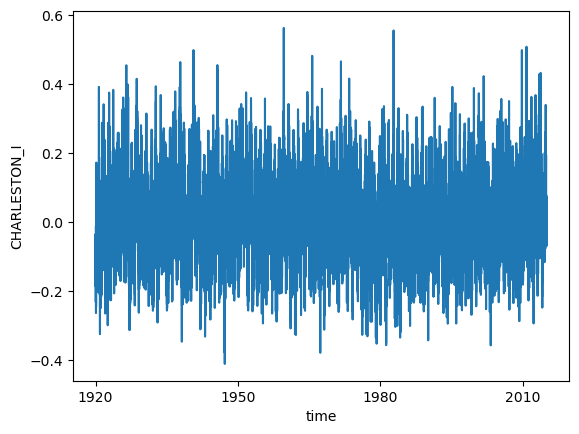

In [25]:
charleston.plot()

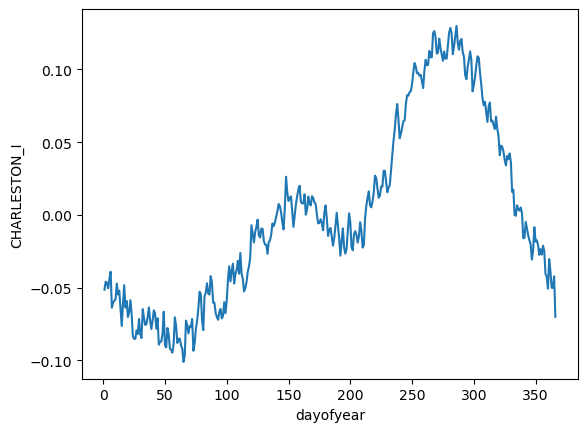

In [18]:
charleston.groupby(charleston.time.dt.dayofyear).mean().plot()

In [26]:
ds_tide_gauge.to_netcdf("/work/Katherine.Turner/sealevel/data/model_timeseries_odiv2.nc")